In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import itertools
sns.set(rc={'figure.figsize':(15,8)})

In [2]:
df=pd.read_csv("sample.csv")
df.describe()

,wage,education,exper,age
count,500.000000,500.000000,500.000000,500.000000
mean,12.680160,13.062000,19.648000,38.710000
std,8.290929,3.374156,11.739494,11.297308
min,1.500000,0.000000,0.000000,18.000000
25%,6.920000,12.000000,9.000000,30.000000
50%,10.680000,12.000000,19.000000,38.000000
75%,16.000000,16.000000,28.000000,47.000000
max,64.080002,20.000000,56.000000,65.000000


<AxesSubplot: xlabel='female'>

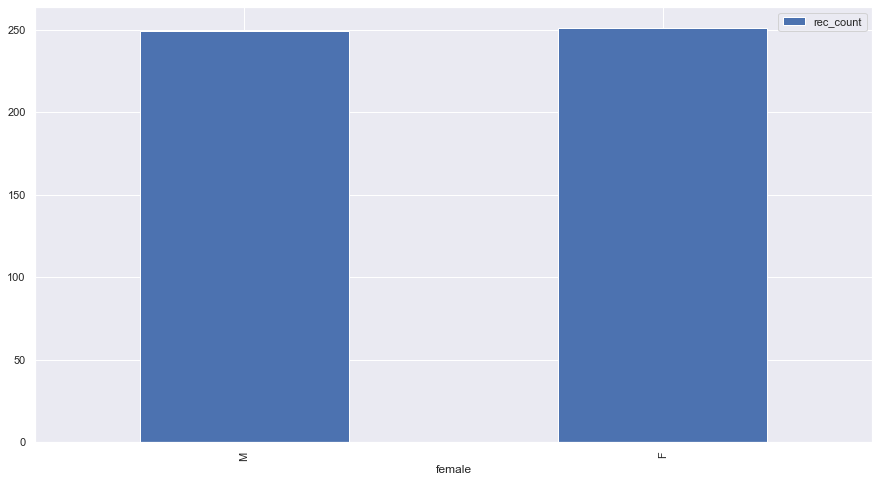

In [3]:
df_female=df.groupby("female").agg(rec_count=("wage","count")). \
sort_values("rec_count",ascending=True)
df_female.plot(kind='bar',stacked=False, figsize=(15,8))

<AxesSubplot: xlabel='nonwhite'>

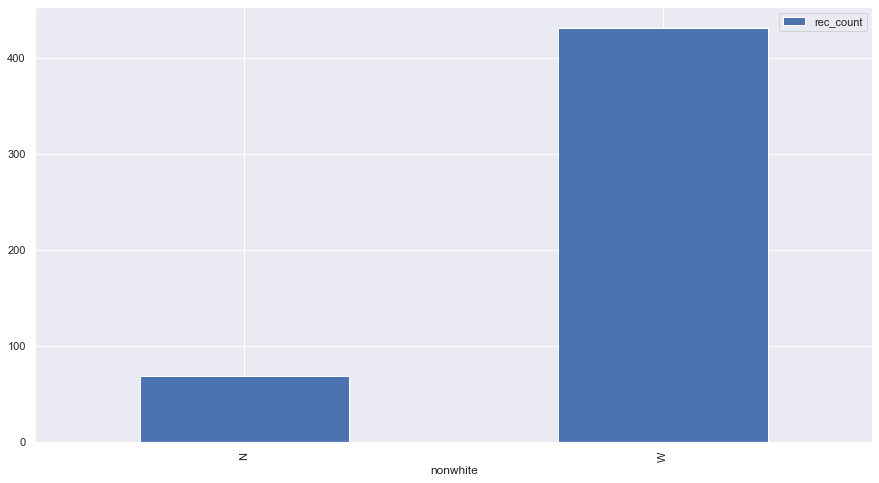

In [4]:
df_nonwhite=df.groupby("nonwhite").agg(rec_count=("wage","count")). \
sort_values("rec_count",ascending=True)
df_nonwhite.plot(kind='bar',stacked=False, figsize=(15,8))

<AxesSubplot: xlabel='union'>

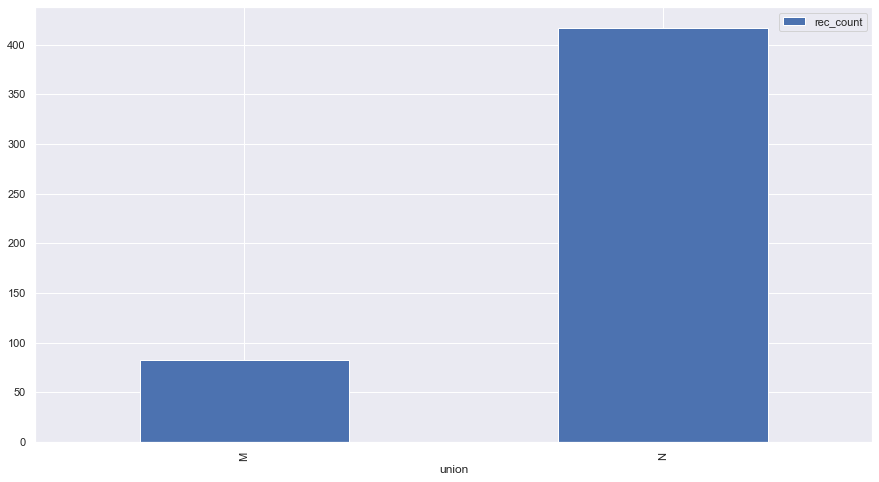

In [5]:
df_union=df.groupby("union").agg(rec_count=("wage","count")). \
sort_values("rec_count",ascending=True)
df_union.plot(kind='bar',stacked=False, figsize=(15,8))

## 1. Calculate the correlation between the variables, Wage, Education and Exper and comment on the correlation coefficients.

In [6]:
df1=df.copy()
df_cor=df1[['wage','education','exper']].corr()
df_cor

,wage,education,exper
wage,1.000000,0.462107,0.007722
education,0.462107,1.000000,-0.272293
exper,0.007722,-0.272293,1.000000


Text(0.5, 0, 'Experience')

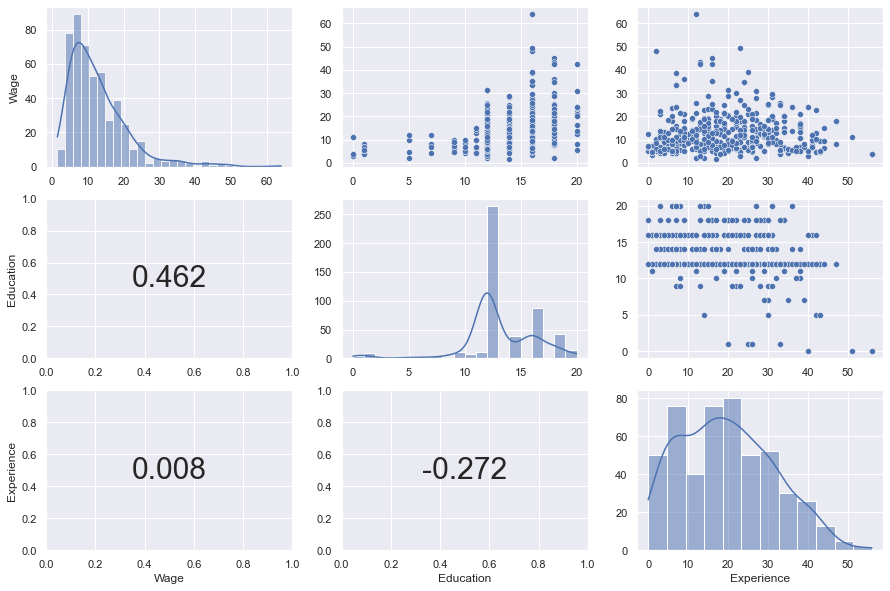

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

#create boxplot in each subplot
#1st row
sns.histplot(data=df1, x="wage", kde=True, ax=axes[0,0])
sns.scatterplot(data=df1, x='education', y='wage', ax=axes[0,1])
sns.scatterplot(data=df1, x='exper', y='wage', ax=axes[0,2])
#2nd row
axes[1,0].text(0.5, 0.5, str(np.round(df_cor.loc['education','wage'],3)), 
               fontsize=30, 
               horizontalalignment='center', 
               verticalalignment='center')
sns.histplot(data=df1, x="education", kde=True, ax=axes[1,1])
sns.scatterplot(data=df1, x='exper', y='education', ax=axes[1,2])
#3rd row
axes[2,0].text(0.5, 0.5, str(np.round(df_cor.loc['exper','wage'],3)), 
               fontsize=30, 
               horizontalalignment='center', 
               verticalalignment='center')
axes[2,1].text(0.5, 0.5, str(np.round(df_cor.loc['exper','education'],3)), 
               fontsize=30, 
               horizontalalignment='center', 
               verticalalignment='center')
sns.histplot(data=df1, x="exper", kde=True, ax=axes[2,2])
#fixing axes
for i in range(3):
    for j in range(3):
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
axes[0][0].set_ylabel('Wage')
axes[1][0].set_ylabel('Education')
axes[2][0].set_ylabel('Experience')
axes[2][0].set_xlabel('Wage')
axes[2][1].set_xlabel('Education')
axes[2][2].set_xlabel('Experience')

#fig.suptitle("Correlation matrix")

### Wage and Education Correlation
Wage and Education are positively linearly correlated, as it can be seen in the figure above. Positive correlation implies that with increase in education, the wage will also increase. The strength of the correlation is 0.462.

### Wage and Experience Correlation
Wage are Experience correlation coefficent is very close to 0 and thus implies that there is no linear correlation between the two variables. This doesnot mean that there is no correlation, it might happend that the two variables are correlated nonlinearly.

### Experience and Education Correlation
Experience and Education are slightly negetively correlated because the correlation coefficent is -0.272.
Since the Experience field is calculated as (Age-Education-6), so when compared between 2 person of same age, the person with more number of years of education will have less experience, and thus the negetive correlation.

## 2. Fit a multiple regression equation with Wage as the dependent variable and all the other variables (except Age) as independent variables. (this is Regression Equation 1)

Before we start with mulitple regresssion, we have to convert the categorical variables to numerical ones, so using one hot encoding for variables female, nonwhite and union

In [8]:
df=pd.read_csv("sample.csv")
female_encoded = pd.get_dummies(df['female'], prefix='female')
nw_encoded = pd.get_dummies(df['nonwhite'], prefix='nonwhite')
union_encoded = pd.get_dummies(df['union'], prefix='union')
df = pd.concat([df, female_encoded,nw_encoded,union_encoded], axis=1)

df["female"]=df['female_F']  # 1 if person is female
df["nonwhite"]=df['nonwhite_N']  # 1 if person is non white
df["union"]=df['union_M']  # 1 if person is in Union

df = df.drop(['female_F','female_M','nonwhite_N','nonwhite_W','union_M','union_N'], axis=1)


In [9]:
df2=df.copy()
X = df2.drop(["wage","age"],axis=1)
X= sm.add_constant(X)
y = df2['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 07 May 2023   Prob (F-statistic):           9.22e-35
Time:                        20:46:47   Log-Likelihood:                -1681.0
No. Observations:                 500   AIC:                             3374.
Df Residuals:                     494   BIC:                             3399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3714      1.628     -1.457      0.1

#### Since the intercept is statistically insignificant, thus removing it from the equation and then fitting the regression line

In [10]:
X = df2.drop(["wage","age"],axis=1)
y = df2['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              365.1
Date:                Sun, 07 May 2023   Prob (F-statistic):                   1.78e-163
Time:                        20:46:48   Log-Likelihood:                         -1682.1
No. Observations:                 500   AIC:                                      3374.
Df Residuals:                     495   BIC:                                      3395.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Since the union is statistically insignificant, thus removing it from the equation and then fitting the regression line

In [11]:
X = df2.drop(["wage","age","union"],axis=1)
y = df2['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())
#est2.fittedvalues
#est2.summary2()

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              454.9
Date:                Sun, 07 May 2023   Prob (F-statistic):                   2.17e-164
Time:                        20:46:49   Log-Likelihood:                         -1683.1
No. Observations:                 500   AIC:                                      3374.
Df Residuals:                     496   BIC:                                      3391.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Since, female, nonwhite, education and exper independent variables are statistically significant for  an alpha value of 0.05, so the final equation becomes
$$  wage= 1.0327*education + 0.0754*exper -3.8624*female -1.8621*nonwhite $$

<AxesSubplot: xlabel='exper', ylabel='residual'>

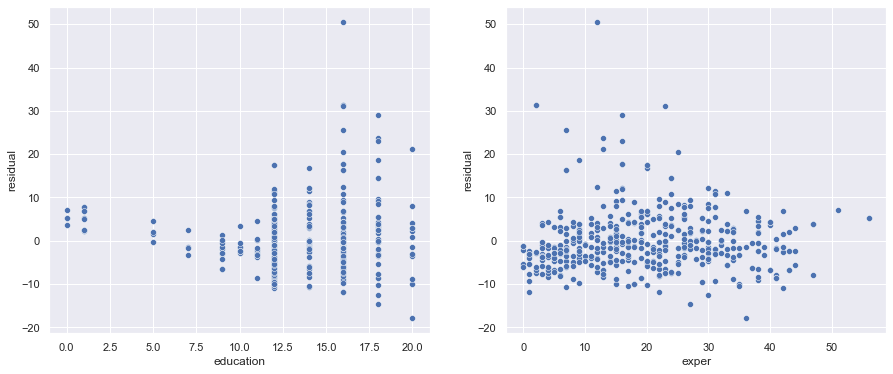

In [12]:
df_out=df.copy()
df_out["fitted_values"]= est2.fittedvalues
df_out["residual"]=df_out['wage']-df_out['fitted_values']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.scatterplot(data=df_out, x='education', y='residual', ax=axes[0])
sns.scatterplot(data=df_out, x='exper', y='residual', ax=axes[1])

In the above residual vs predictor variable graph, we see a pattern with education, that implies some hidden pattern in the data which can be explored using transformations or interaction variable.<br><br>
Similarly, for exper, there is slight decreasing pattern that is visible and can be checked out for interaction variables

## 3. Comment on the R2, F-test and individual p values of the coefficients with respect to Regresion Equation 1

The equation is $$  wage= 1.0327*education + 0.0754*exper -3.8624*female -1.8621*nonwhite $$ with $$ R2=0.786 $$ and $$ F-statistic=454.9 $$

The R2 for above equation is 0.786, that implies that 78.6% of the total variation is explained by this regression equation.<br><br>
A F-statistic value of 454.9 indicates that the explained variance in the regression model is 454.9 times larger than the unexplained variance. This suggests that the regression model is statistically significant, and the independent variables jointly have a significant impact on the dependent variable.

#### P-value explanation when compared to an alpha value of 0.05
In 1st iteration, the p-value for constant, union and nonwhite variables were statistically insignificant and the p-value for education, female and exper variables were statistically significant. This implies that the beta values for constant, union and nonwhite variables  are 0 and non-zero for all others.<br><br>
In 2nd iteration, I removed the constant part from the model, since it is statistically insignificant, and then fitted a regression line, in which case the union variable's p-value remained statistically insignificant and all other variables become statistically significant.<br><br>
In 3rd iteration, on removing the union variable from the input, and then fitting the equation, all the variables (education, exper, nonwhite and female) become statistically significant.<br>
The P-values for education, exper, nonwhite and female are 0.000, 0.001, 0.042 and 0.000 respectively.

## 4.Fit a multiple regression equation with Wage as the dependent variable and all the other variables (including Age) as independent variables. Explain the results

In [13]:
df4=df.copy()

#### 1st iteration of regression line fitting

In [14]:
X = df4.drop(["wage"],axis=1)
X= sm.add_constant(X)
y = df4['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 07 May 2023   Prob (F-statistic):           9.22e-35
Time:                        20:46:52   Log-Likelihood:                -1681.0
No. Observations:                 500   AIC:                             3374.
Df Residuals:                     494   BIC:                             3399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3742      0.142     -2.643      0.0

In [15]:
df4[["wage","education","exper","age"]].corr()

,wage,education,exper,age
wage,1.000000,0.462107,0.007722,0.146041
education,0.462107,1.000000,-0.272293,0.015719
exper,0.007722,-0.272293,1.000000,0.957816
age,0.146041,0.015719,0.957816,1.000000


#### 2nd iteration of regression line fitting
The exper variable in the above fitted line is insignificant and has lowest correlation with wage, the dependent variable, so removing it from the input and running the regression again.

In [16]:
X = df4.drop(["wage","exper"],axis=1)
X= sm.add_constant(X)
y = df4['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 07 May 2023   Prob (F-statistic):           9.22e-35
Time:                        20:46:54   Log-Likelihood:                -1681.0
No. Observations:                 500   AIC:                             3374.
Df Residuals:                     494   BIC:                             3399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9254      1.728     -1.693      0.0

#### 3rd iteration
The intercept has become insignificant, so removing it from the independent variable list and re-running the model

In [17]:
X = df4.drop(["wage","exper"],axis=1)
#X= sm.add_constant(X)
y = df4['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              364.4
Date:                Sun, 07 May 2023   Prob (F-statistic):                   2.57e-163
Time:                        20:46:55   Log-Likelihood:                         -1682.5
No. Observations:                 500   AIC:                                      3375.
Df Residuals:                     495   BIC:                                      3396.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 4th iteration
The union variable has become statistically insignifcant thus removing it and re-running the model

In [18]:
X = df4.drop(["wage","exper","union"],axis=1)
#X= sm.add_constant(X)
y = df4['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              453.9
Date:                Sun, 07 May 2023   Prob (F-statistic):                   3.34e-164
Time:                        20:46:56   Log-Likelihood:                         -1683.5
No. Observations:                 500   AIC:                                      3375.
Df Residuals:                     496   BIC:                                      3392.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The above output shows that the variables female, nonwhite, education and age are statistically significant in explaining the variation in wage, the dependent variable. The equation becomes
$$ wage= 0.9462*education+ 0.0681*age -3.8860*female -1.8917*nonwhite $$
The R2 value is 0.785, which means that the equation is able to explain 78.5% of total variation in the data.<br><br>
The equation says that :
<ol>
<li>A person with no education and no age will have no wage.</li>
<li>With every additional 1 unit increase in education, the wage of the person will increase by 0.9462 times.</li>
<li>With every additional 1 unit increase in age, the wage of the person will increase by 0.0681 times.</li>
<li>If the person is female than, her wage is 3.8860 unit less than her male counterpart with all other independent variables being same for both.</li>
<li>If the person is nonwhite than, the wage is 1.8917 unit less than the white person whose all other independent variable values are same as this nonwhite person.</li>
</ol>

<AxesSubplot: xlabel='age', ylabel='residual'>

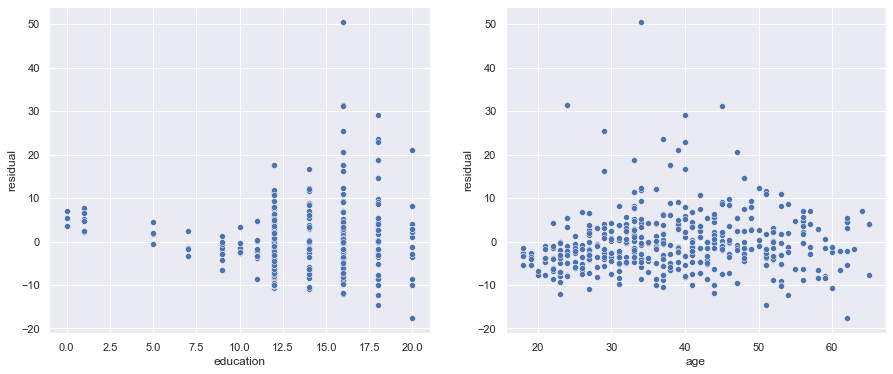

In [19]:
df_out=df.copy()
df_out["fitted_values"]= est2.fittedvalues
df_out["residual"]=df_out['wage']-df_out['fitted_values']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.scatterplot(data=df_out, x='education', y='residual', ax=axes[0])
sns.scatterplot(data=df_out, x='age', y='residual', ax=axes[1])

In the above residual vs predictor variable graph, we see a pattern with education, that implies some hidden pattern in the data which can be explored using transformations or interaction variable

## 5. Find out if the two variables, Education and Exper have any interaction effect with respect to Gender, Race and Union Status

we know from Q2 and Q4 that there are interaction effect with education and exper as visible from residual and predictor variable graph. Building on the output of Q4, lets explore the interaction variables

### checking for EducationxGender

In [20]:
df5=df.copy()
df5["EducationxGender"]=df5["education"]*df["female"]

X = df5.drop(["wage","exper","union",],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     41.50
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.15e-35
Time:                        20:46:59   Log-Likelihood:                -1678.9
No. Observations:                 500   AIC:                             3370.
Df Residuals:                     494   BIC:                             3395.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.9889      2.075  

EducationxGender is significant but female has become insignificant, as its effect is explained by the interaction variable.

### checking for EducationxRace

In [21]:
df5=df.copy()
df5["EducationxRace"]=df5["education"]*df["nonwhite"]

X = df5.drop(["wage","exper","union","nonwhite"],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     50.32
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.55e-35
Time:                        20:47:00   Log-Likelihood:                -1681.3
No. Observations:                 500   AIC:                             3373.
Df Residuals:                     495   BIC:                             3394.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.2339      1.703     -1.

The interaction variable EducationxRace for nonwhite people is significant, if we dont add nonwhite variable to the equation


### checking for EducationxUnion

In [22]:
df5=df.copy()
df5["EducationxUnion"]=df5["education"]*df["union"]

X = df5.drop(["wage","exper","union"],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.51e-34
Time:                        20:47:01   Log-Likelihood:                -1681.5
No. Observations:                 500   AIC:                             3375.
Df Residuals:                     494   BIC:                             3400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8859      1.745     

EducationxUnion variable is insignificant
### checking for experxGender

In [23]:
df5=df.copy()
df5["experxGender"]=df5["exper"]*df["female"]

X = df5.drop(["wage","exper","union"],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     39.82
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.18e-34
Time:                        20:47:02   Log-Likelihood:                -1681.9
No. Observations:                 500   AIC:                             3376.
Df Residuals:                     494   BIC:                             3401.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1437      1.880     -1.672   

experxGender is insignificant.
### checking for experxRace

In [24]:
df5=df.copy()
df5["experxRace"]=df5["exper"]*df["nonwhite"]

X = df5.drop(["wage","exper","union"],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     40.22
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.08e-34
Time:                        20:47:03   Log-Likelihood:                -1681.2
No. Observations:                 500   AIC:                             3374.
Df Residuals:                     494   BIC:                             3400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8198      1.741     -1.620      0.1

The interaction variable experxRace is insignificant
### checking for experxUnion

In [25]:
df5=df.copy()
df5["experxUnion"]=df5["exper"]*df["union"]

X = df5.drop(["wage","exper","union",],axis=1)
X= sm.add_constant(X)
y = df5['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     41.30
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.65e-35
Time:                        20:47:04   Log-Likelihood:                -1679.2
No. Observations:                 500   AIC:                             3370.
Df Residuals:                     494   BIC:                             3396.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4707      1.739     -1.421      

experxUnion is significant

### conclusion

The variables <b>Education with Gender</b>, <b>Education with Race</b> and <b>exper with Union</b> are significant and rest of the interaction variables are insignificant

## 6.Use Stepwise method to fit a regression equation with Wage as the dependent variable and all other variables, including interaction variables as independent variables (This is Regression Equation 2)

#### Adding 1st variable and constant in the regression

In [26]:
df6_e=df.copy()
df6_e["EducationxFemale"]=df6_e["education"]*df6_e["female"]
df6_e["experxUnion"]=(df6_e["exper"])*(df6_e["union"])
df6_e["educationxexper"]=df6_e["education"]*df6_e["exper"]

In [27]:
X = df6_e[["education"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     135.2
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.10e-28
Time:                        20:47:08   Log-Likelihood:                -1706.5
No. Observations:                 500   AIC:                             3417.
Df Residuals:                     498   BIC:                             3425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1515      1.317     -1.633      0.1

<b>since education is significant, so adding the age variable</b>

In [28]:
X = df6_e[["education","age"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     75.41
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.51e-29
Time:                        20:47:09   Log-Likelihood:                -1700.3
No. Observations:                 500   AIC:                             3407.
Df Residuals:                     497   BIC:                             3419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0249      1.702     -3.539      0.0

<b>since education and age is significant, so adding the female variable</b>

In [29]:
X = df6_e[["education","age","female"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     65.30
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.34e-35
Time:                        20:47:09   Log-Likelihood:                -1683.3
No. Observations:                 500   AIC:                             3375.
Df Residuals:                     496   BIC:                             3392.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6782      1.695     -2.170      0.0

<b>since education, age and female is significant, so adding the EducationxFemale variable</b>

In [30]:
X = df6_e[["education","age","female","EducationxFemale"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     50.73
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.62e-36
Time:                        20:47:10   Log-Likelihood:                -1680.7
No. Observations:                 500   AIC:                             3371.
Df Residuals:                     495   BIC:                             3392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.4311      2.067  

<b>female variable had become insignificant on introducing interaction variable EducationxFemale, so removing that from the model.<br>
Now adding educationxexper interaction variable.</b>

In [31]:
X = df6_e[["education","age","EducationxFemale","educationxexper"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.26
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.54e-37
Time:                        20:47:11   Log-Likelihood:                -1677.1
No. Observations:                 500   AIC:                             3364.
Df Residuals:                     495   BIC:                             3385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.0831      3.180  

<b>Now adding exper variable</b>

In [32]:
X = df6_e[["education","age","educationxexper","EducationxFemale","exper"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.26
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.54e-37
Time:                        20:47:12   Log-Likelihood:                -1677.1
No. Observations:                 500   AIC:                             3364.
Df Residuals:                     495   BIC:                             3385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1803      0.248  

<b>now adding nonwhite variable</b>

In [33]:
X = df6_e[["education","age","educationxexper","EducationxFemale","exper","nonwhite"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     43.62
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.02e-37
Time:                        20:47:13   Log-Likelihood:                -1675.1
No. Observations:                 500   AIC:                             3362.
Df Residuals:                     494   BIC:                             3388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1422      0.248  

<b>now adding experxUnion</b>

In [34]:
X = df6_e[["education","age","educationxexper","EducationxFemale","exper","nonwhite","experxUnion"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     37.21
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.11e-37
Time:                        20:47:13   Log-Likelihood:                -1673.2
No. Observations:                 500   AIC:                             3360.
Df Residuals:                     493   BIC:                             3390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0570      0.251  

<b>now adding union</b>

In [35]:
X = df6_e[["education","age","educationxexper","EducationxFemale","exper","nonwhite","experxUnion","union"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     32.01
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.29e-36
Time:                        20:47:14   Log-Likelihood:                -1672.7
No. Observations:                 500   AIC:                             3361.
Df Residuals:                     492   BIC:                             3395.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0148      0.255  

<b>As union is insignificant so the final regression model becomes</b>

In [36]:
X = df6_e[["education","age","educationxexper","EducationxFemale","exper","nonwhite","experxUnion"]]
X= sm.add_constant(X)
y = df6_e['wage']
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     37.21
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.11e-37
Time:                        20:47:15   Log-Likelihood:                -1673.2
No. Observations:                 500   AIC:                             3360.
Df Residuals:                     493   BIC:                             3390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0570      0.251  

So the final equation is 
$$ wage= -1.0570+3.1668*education-1.4326*age-0.0186*educationxexper-0.2826*EducationxFemale+1.7429*exper-2.0363*nonwhite+0.0656*experxUnion$$

## 7. Interpret each of the regression coefficients of Regression Equation 2

|    | variable   | coefficient   |   interpretation |
|---:|:-----------|---------:|:-------------|
|1|constant|-1.0570|In our data we have minimum age of a person as 18 years, so a person is educated for 12 years minimum. So this constant value implies that for a white man who is 18 years old, his wage will be $ (3.1668*12) - 1.0570 - (1.4326*18) =  $11.15779|
|2|education|3.1668|For every additional 1 year of education, the wage increases by 3.1668 unit|
|3|age|-1.4326|For every additional 1 year of age, the wage decreases by 1.4326 unit|
|4|educationxExper|-0.0186|For every additional 1 unit increase of education * Experience, the wage decreases by 0.0186 unit|
|5|EducationxFemale|-0.2826|For every additional 1 year of education, a female is paid 0.2826 unit less than her male counterpart when every other variable is same|
|6|exper|1.7429|For every additional 1 year of experience, the wage increases by 1.7429 unit|
|7|nonwhite|-2.0363|if the person is nonwhite, then the wage is less by 2.0363 unit when compared to his/her white person counterpart, when every other variable is same|
|8|experxUnion|0.0656|For every additional 1 year of experience, a person in union, is paid 0.0656 unit more, than the person who is not in union|


## 8. Test whether the Normality assumption with respect to errors of Regression Equation 2 is satisfied

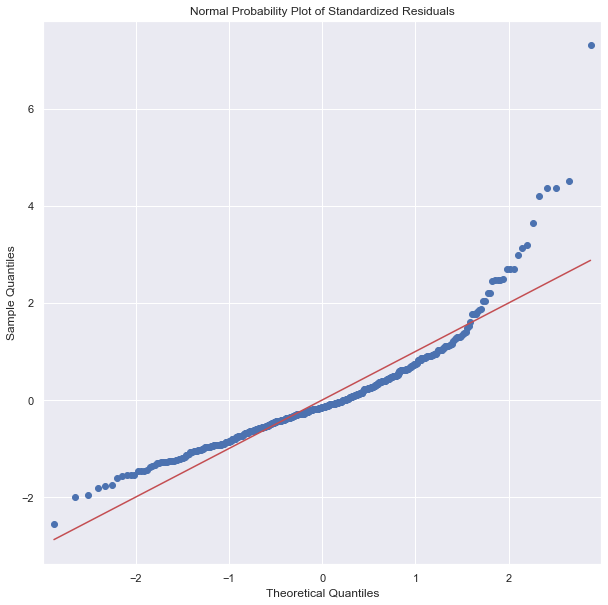

In [37]:

# Get the standardized residuals
std_resid = est2.get_influence().resid_studentized_internal

# Create a normal probability plot of the standardized residuals
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(std_resid, line='s', ax=ax)
ax.set_title('Normal Probability Plot of Standardized Residuals')
plt.show()

The points lie close to a straight line, so it suggests that the residuals follow a normal distribution

## 9. Is there a gender bias in the wage rate?

Yes there is a gender bias in the wage rate, the female person is paid less than her male couterpart.<br>
if we look at the equation output of Q4, then we will find that, If the person is female than, her wage is 3.8860 unit less than her male counterpart with all other independent variables being same for both.<br>
Also if we look at output in Q6, then we will find that, for every additional 1 year of education, a female person is paid 0.2826 unit less than her male counterpart when every other variable is same.<br>
This clealy shows a gender bias in the wage rate.

## 10. Is there any advantage of union membership to those with higher education?

As per equation derived from Q6, there is <b>no advantage</b> of union membership to those with higher education, but there is an advantage of union membership to those with higher experience.